In [1]:
import numpy as np
import math
import gym
import matplotlib.pyplot as plt
from collections import defaultdict

## Helper Functions

In [2]:
def e_greedy_policy(epsilon, action_values):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        action = np.argmax(action_values)
    return action

def run_episode(Q, epsilon, max_t=10000, render=False):
    trajectory = []
    state = env.reset()
    for t in range(max_t):
        if render:
            env.render()
        action = e_greedy_policy(epsilon, Q[state])
        next_state, reward, done, info = env.step(action)
        trajectory.append((state,action,reward))
        state = next_state
        if done:
            break
    states, actions, rewards = zip(*trajectory)
    return states, actions, rewards

# Learning Algorithms

## SARSA

In [3]:
def SARSA(env, num_episodes, n_avg, alpha, epsilon, gamma, max_t=10000):
    Q = defaultdict(lambda: np.random.random(4))
    episode_rewards = [] 
    rolling_avg = []

    for i_episode in range(num_episodes):
        state = env.reset()
        action = e_greedy_policy(epsilon, Q[state])
        reward_sum = 0
        for t in range(max_t):
            next_state, reward, done, info = env.step(action)
            reward_sum += reward
            next_action = e_greedy_policy(epsilon, Q[next_state])
            Q[state][action] = Q[state][action] + alpha*(reward + gamma*Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action
            if done:
                break
        episode_rewards.append(reward_sum)
        
        if i_episode > n_avg:
            rolling_avg.append(np.mean(episode_rewards[-n_avg:]))

    return episode_rewards, Q, rolling_avg

## Q-Learning

In [4]:
def Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma, max_t=10000):
    Q = defaultdict(lambda: np.zeros(env.nA))
    episode_rewards = [] 
    rolling_avg = []

    for i_episode in range(num_episodes):
        state = env.reset()
        reward_sum = 0
        for t in range(max_t):
            action = e_greedy_policy(epsilon, Q[state])
            next_state, reward, done, info = env.step(action)
            reward_sum += reward
            Q[state][action] = Q[state][action] + alpha*(reward + gamma*np.max(Q[next_state]) - Q[state][action])
            state = next_state
            if done:
                break
        episode_rewards.append(reward_sum)
        
        if i_episode > n_avg:
            rolling_avg.append(np.mean(episode_rewards[-n_avg:]))

    return episode_rewards, Q, rolling_avg

## Every-Visit Monte Carlo

In [5]:
def Every_Visit_Monte_Carlo(env, num_episodes, n_avg, alpha, epsilon, gamma, max_t=10000):
    Q = defaultdict(lambda: np.zeros(env.nA))
    N = defaultdict(lambda: np.zeros(env.nA))
    total_returns = defaultdict(lambda: np.zeros(env.nA))
    episode_rewards = [] 
    rolling_avg = []
  
    for i_episode in range(num_episodes):
        states, actions, rewards = run_episode(Q, epsilon, max_t)
        episode_rewards.append(sum(rewards))
        for t in range(len(states)):
            state = states[t]
            action = actions[t]
            discounts = gamma**np.arange(0,len(rewards[t:]))
            total_returns[state][action] += sum(discounts*rewards[t:])
            N[state][action] += 1
            Q[state][action] = total_returns[state][action]/N[state][action]
        
        if i_episode > n_avg:
            rolling_avg.append(np.mean(episode_rewards[-n_avg:]))

    return episode_rewards, Q, rolling_avg

# Part 1: Cliffwalking

In [6]:
env = gym.make('CliffWalking-v0')

1a. Recreate the figure below in the text using the 'CliffWalking-v0' task in OpenGym.

In [7]:
num_episodes = 1000
n_avg = 25
alpha = 0.1
epsilon = 0.1
gamma = 1

SARSA_rewards, SARSA_q, SARSA_avgs = SARSA(env, num_episodes, n_avg, alpha, epsilon, gamma)
Q_Learning_rewards, Q_Learning_q, Q_Learning_avgs = Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma)

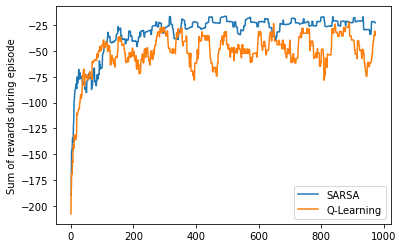

In [8]:
plt.plot(SARSA_avgs, label='SARSA')
plt.plot(Q_Learning_avgs, label='Q-Learning')
plt.ylabel('Sum of rewards during episode')
plt.legend()
plt.savefig('Figures/A3P1-1a.png')
plt.show()

In [9]:
_, _, _ = run_episode(SARSA_q, 0, max_t=100, render=True)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

In [10]:
_, _, _ = run_episode(Q_Learning_q, 0, max_t=100, render=True)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

1b. Add on-policy Monte Carlo. How does it compare?

In [11]:
num_episodes = 15000
epsilon = 0.1
alpha = 0.1
gamma = 1
n_avg = 100

SARSA_rewards, SARSA_q, SARSA_avgs = SARSA(env, num_episodes, n_avg, alpha, epsilon, gamma)
Q_Learning_rewards, Q_Learning_q, Q_Learning_avgs = Q_Learning(env, num_episodes, n_avg, alpha, epsilon, gamma)
MC_rewards, MC_q, MC_avgs = Every_Visit_Monte_Carlo(env, num_episodes, n_avg, alpha, 0.1, gamma, max_t=1000)
env.close()

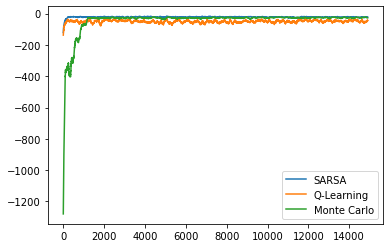

In [12]:
plt.plot(SARSA_avgs, label='SARSA')
plt.plot(Q_Learning_avgs, label='Q-Learning')
plt.plot(MC_avgs, label='Monte Carlo')
plt.legend()
plt.savefig('Figures/A3P1-1b-1.png')
plt.show()

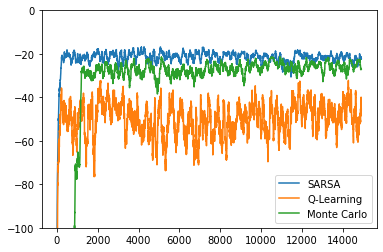

In [13]:
plt.plot(SARSA_avgs, label='SARSA')
plt.plot(Q_Learning_avgs, label='Q-Learning')
plt.plot(MC_avgs, label='Monte Carlo')
axes = plt.gca()
axes.set_ylim([-100,0])
plt.legend()
plt.savefig('Figures/A3P1-1b-2.png')
plt.show()

In [14]:
_, _, _ = run_episode(MC_q, 0, max_t=100, render=True)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o